In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14
})

In [9]:
def gauss(x, A, B, C, x_0):
    return A * np.exp(-B * (x-x_0) ** 2) + C

def two_gauss(x, A1, A2, B1, B2, C1, C2, x_1, x_2):
    return A1 * np.exp(-B1 * (x-x_1) ** 2) + C1 + A2 * np.exp(-B2 * (x-x_2) ** 2) + C2

def linear_model(x,a,b):
    return a * x + b

def two_rabi(x, A0, A1, A2, b0, b1, b2, c0, c1, c2, d0, d1, d2, x_0, x_1, x_2):
    return A0*np.sin(b0*(x-x_0))*np.exp(-c0*(x-x_0)) + d0 + A1*np.sin(b1*(x-x_1))*np.exp(-c1*(x-x_1)) + d1 + A2*np.sin(b2*(x-x_2))*np.exp(-c2*(x-x_2)) + d2

def exp_decay(x, A0, A1, A2, b0, b1, b2, c0, c1, c2, x0, x1, x2):
    return A0*np.exp(-b0*(x-x0)) + c0 + A1*np.exp(-b1*(x-x1)) + c1 + A2*np.exp(-b2*(x-x2)) + c2

def lorentzian(x, A, x_0):
    return A / np.pi / ((x-x_0) ** 2 + A ** 2)

def inverse_loretzian(x, A, B, C, x_0):
    return B*(1 - lorentzian(x, A, x_0)) + C

def inverse_multi_loretzian(x, A0, A1, A2, B, C, x_0, x_1, x_2):
    return B*(1 - lorentzian(x, A0, x_0) - lorentzian(x, A1, x_1) - lorentzian(x, A2, x_2)) + C

/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_9726/116241419.py:11: RuntimeWarning: overflow encountered in exp
  return A0*np.sin(b0*(x-x_0))*np.exp(-c0*(x-x_0)) + d0 + A1*np.sin(b1*(x-x_1))*np.exp(-c1*(x-x_1)) + d1 + A2*np.sin(b2*(x-x_2))*np.exp(-c2*(x-x_2)) + d2
/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_9726/116241419.py:11: RuntimeWarning: invalid value encountered in add
  return A0*np.sin(b0*(x-x_0))*np.exp(-c0*(x-x_0)) + d0 + A1*np.sin(b1*(x-x_1))*np.exp(-c1*(x-x_1)) + d1 + A2*np.sin(b2*(x-x_2))*np.exp(-c2*(x-x_2)) + d2


Decay [ 1.97595918e-01  2.70098834e-01  2.77727887e-01  4.75494024e-03
  4.04144450e-04  1.55127298e-03  1.37780407e-02  1.30303312e-02
  2.03582494e-02 -3.63528431e+01  1.61355504e+01  1.14993605e+02]
[1.32182080e-01 6.92988476e-05 4.07101368e+00 2.00345783e+03]


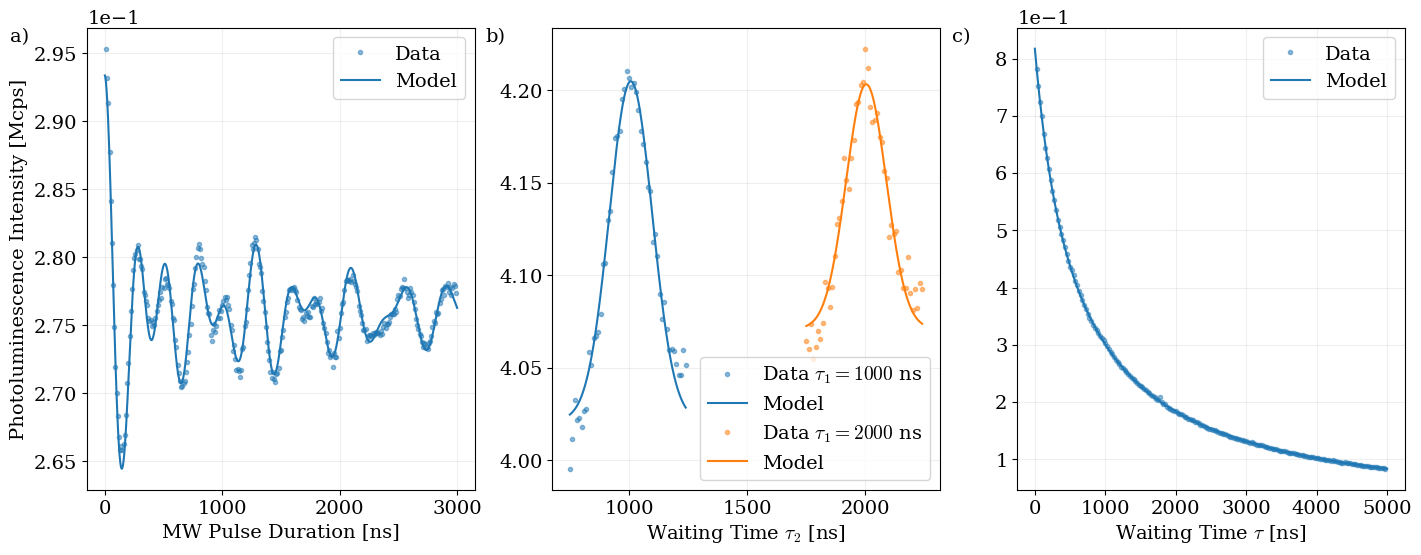

In [51]:
plt.rcParams["figure.figsize"] = (17,6)
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows=1, ncols=3)
ax1, ax2, ax3= axes.flatten()

ax1.text(-0.15, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.12, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')

time_rabi, counts_rabi = np.loadtxt("data/rabi/FoPra-Rabi-1-data.csv", unpack=True)

popt, pcov = curve_fit(two_rabi, time_rabi[1:], counts_rabi[1:]*1e-6, p0=[10000*1e-6, 14000*1e-6, 14000*1e-6, 1/20, 1/45, 1/45, 1/1250, 1/1300, 1/1300, 90000*1e-6, 90000*1e-6, 90000*1e-6, -30, 20, 20], absolute_sigma=True)
x_lin = np.linspace(0, 3000, 3000)
ax1.plot(time_rabi[1:],counts_rabi[1:]*1e-6, ".", alpha=0.5, label="Data")
ax1.plot(x_lin, two_rabi(x_lin, *popt), color="C0", label="Model")
ax1.set_ylabel("Photoluminescence Intensity [Mcps]")
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.set_xlabel("MW Pulse Duration [ns]")
ax1.grid(alpha=0.2)
ax1.legend()
#print("Rabi", popt)


time_hahn_decay, counts_hahn_decay = np.loadtxt("data/hahn_decay/FoPra-HahnEcho-Decay-Retake-data.csv", unpack=True)
popt, pcov = curve_fit(exp_decay, time_hahn_decay[1:], counts_hahn_decay[1:]*1e-6, p0=[0.7/3, 0.7/3, 0.7/3, 1/1000, 1/1000, 1/1000, 0.1, 0.1, 0.1, 0, 0, 0], absolute_sigma=True)
x_lin = np.linspace(0, 5000, 3000)
ax3.plot(time_hahn_decay[1:] ,counts_hahn_decay[1:]*1e-6, ".", alpha=0.5, label="Data")
ax3.plot(x_lin, exp_decay(x_lin, *popt), color="C0", label="Model")
ax3.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#ax2.set_ylabel("Counts")
ax3.grid(alpha=0.2)
ax3.set_xlabel("Waiting Time $\\tau$ [ns]")
ax3.legend()
print("Decay", popt)

time_hahn_echo, counts_hahn_echo = np.loadtxt("data/hahn_echo/FoPra-HahnEcho_1-data.csv", unpack=True)
popt, pcov = curve_fit(gauss, time_hahn_echo[1:], counts_hahn_echo[1:]*1e-6, p0=[0.22, 1/25000, 3.98*1e6, 1000], absolute_sigma=True)
#popt, pcov = curve_fit(two_gauss, time_hahn_echo[1:], counts_hahn_echo[1:], p0=[0.22*1e6/2, 0.22*1e6/2, 1/25000, 1/25000, 3.98*1e6/2, 3.98*1e6/2, 1000, 1000], absolute_sigma=True)
x_lin = np.linspace(min(time_hahn_echo[1:]), max(time_hahn_echo[1:]), 3000)
ax2.plot(time_hahn_echo[1:], counts_hahn_echo[1:]*1e-6, ".", alpha=0.5, label="Data $\\tau_1=1000$ ns")
ax2.plot(x_lin, gauss(x_lin, *popt), color="C0", label="Model")

time_hahn_echo, counts_hahn_echo = np.loadtxt("data/hahn_echo/FoPra-HahnEcho_2-data.csv", unpack=True)
popt, pcov = curve_fit(gauss, time_hahn_echo[1:], counts_hahn_echo[1:]*1e-6, p0=[0.22, 1/25000, 3.98*1e6, 2000], absolute_sigma=True)
#popt, pcov = curve_fit(two_gauss, time_hahn_echo[1:], counts_hahn_echo[1:], p0=[0.22*1e6/2, 0.22*1e6/2, 1/25000, 1/25000, 3.98*1e6/2, 3.98*1e6/2, 1000, 1000], absolute_sigma=True)
x_lin = np.linspace(min(time_hahn_echo[1:]), max(time_hahn_echo[1:]), 3000)
ax2.plot(time_hahn_echo[1:], counts_hahn_echo[1:]*1e-6, ".", alpha=0.5, label="Data $\\tau_1=2000$ ns")
ax2.plot(x_lin, gauss(x_lin, *popt), color="C1", label="Model")


ax2.grid(alpha=0.2)
#ax3.set_ylabel("Counts")
ax2.set_xlabel("Waiting Time $\\tau_2$ [ns]")
ax2.legend()

print(popt)

plt.savefig('Multiplot.pdf', bbox_inches='tight')  

Zero field [0.01242256 0.01517776 1.34515076 2.8701118 ]
Mag field [0.0079974  0.00815644 0.00881397 0.00823979 3.14010363 2.81712687
 2.87162462 2.92450962]


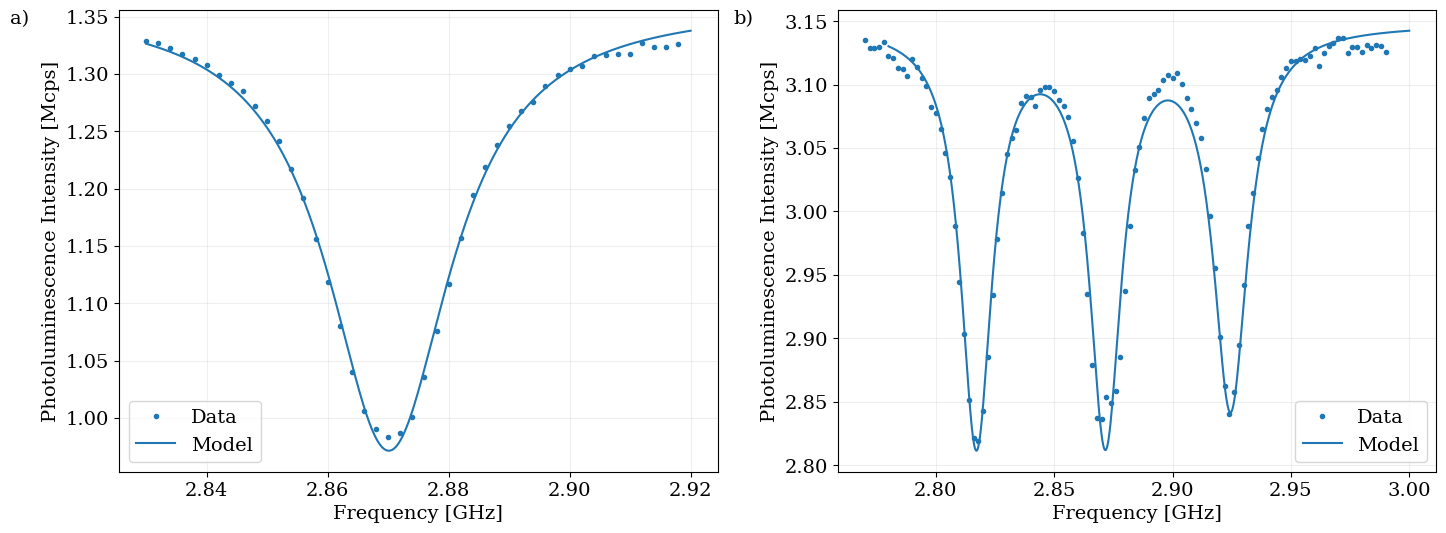

In [7]:
plt.rcParams["figure.figsize"] = (17,6)
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes.flatten()

ax1.text(-0.15, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.14, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')

freq, counts_odmr = np.loadtxt("data/ODMR/ cwODMR_ohne_magnet-data.csv", unpack=True)
popt, pcov = curve_fit(inverse_loretzian, freq[1:], counts_odmr[1:]*1e-6, p0=[0.01, 0.3, 2, 2.87], absolute_sigma=True)
x_lin = np.linspace(2.83, 2.92, 1000)
ax1.plot(freq[1:], counts_odmr[1:]*1e-6, ".", label="Data")
ax1.plot(x_lin, inverse_loretzian(x_lin, *popt), color="C0", label="Model")
ax1.set_ylabel("Photoluminescence Intensity [Mcps]")
ax1.set_xlabel("Frequency [GHz]")
ax1.grid(alpha=0.2)
ax1.legend()
print("Zero field", popt)

freq, counts_odmr = np.loadtxt("data/ODMR/ cwODMR_mit_magnet_8-data.csv", unpack=True)
popt, pcov = curve_fit(inverse_multi_loretzian, freq[1:], counts_odmr[1:]*1e-6, p0=[0.01, 0.01, 0.01, 0.3, 2, 2.82, 2.865, 2.925], absolute_sigma=True)
x_lin = np.linspace(2.78, 3, 1000)
ax2.plot(freq[1:], counts_odmr[1:]*1e-6, ".", label="Data")
ax2.plot(x_lin, inverse_multi_loretzian(x_lin, *popt), color="C0", label="Model")
ax2.set_ylabel("Photoluminescence Intensity [Mcps]")
ax2.set_xlabel("Frequency [GHz]")
ax2.grid(alpha=0.2)
ax2.legend()
print("Mag field", popt)

plt.savefig('ODMR.pdf', bbox_inches='tight') 

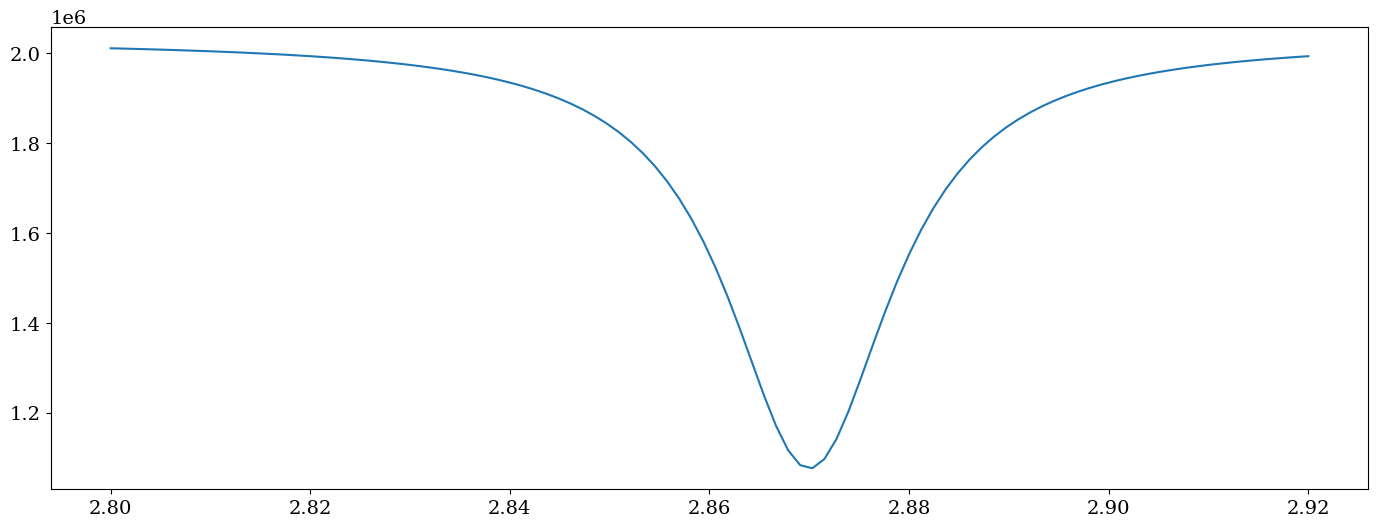

In [ ]:
x_lin = np.linspace(2.8, 2.92, 100)

plt.plot(x_lin, inverse_loretzian(x_lin, 0.01, 0.3e5, 2e6, 2.87))

In [7]:
{
    'measdev': {
            'type': 'local', 
            'module': 'artiq.quint.devices.custom_measurement', 
            'class': 'CustomMeasurementDevice', 
            'arguments': 
                {
                    'fpga': None, 
                    'definitions': [
                        ('ps3', 'PicoscopeMeasurement', [], ['time', 'A', 'B', 'C', 'D'], {'device': 'picoscope3000'}), 
                        ('ps5', 'PicoscopeMeasurement', [], ['time', 'A', 'B', 'C', 'D'], {'device': 'picoscope5000'}), 
                        ('ps6', 'PicoscopeMeasurement', [], ['time', 'A', 'B', 'C', 'D'], {'device': 'picoscope6000'}), 
                        ('Transmission', 'CalibratedMeasurement', ['ps3.A'], ['t'], {'calib': 'Transmission'}), 
                        ('Excitation', 'CalibratedMeasurement', ['ps3.B'], ['e'], {'calib': 'Excitation'}), 
                        ('I', 'CalibratedMeasurement', ['ps3.C'], ['i'], {'calib': 'I'}), 
                        ('Q', 'CalibratedMeasurement', ['ps3.D'], ['q'], {'calib': 'Q'}), 
                        ('IQ', 'MagPhaseMeasurement', ['Q.q', 'I.i'], ['mag', 'phase'], {}), 
                        ('RelTransmission', 'NormalizedMeasurement', ['Transmission.t', 'Excitation.e'], ['rt'], {})], 
                    'profiles': {
                        'Default': [
                            'Transmission.t', 
                            'Excitation.e', 
                            'RelTransmission.rt', 
                            'I.i', 
                            'Q.q', 
                            'IQ.mag', 'IQ.phase'], 
                        'TestProfile': ['Transmission.t']
                        }
                }
        }, 
    'commandwriter': {
            'type': 'local', 
            'module': 'artiq.quint.devices.commandwriter', 
            'class': 'Commandwriter', 
            'arguments': {'host': 'localhost', 'port': 3789}
        }, 
    'DDS2': {
            'type': 'local', 
            'module': 'artiq.quint.devices.DDS', 
            'class': 'DDS_System', 
            'arguments': {'host': '192.168.1.900', 'channels': 18, 'has_profile_pins': True}
        }, 
    'influxdb_reader': {
            'type': 'local', 
            'module': 'artiq.quint.devices.influxdb_reader', 
            'class': 'InfluxDB_Reader', 
            'arguments': {'host': '192.168.1.38', 'port': 8086, 'db': 'quint'}
        }, 
    'picoscope3000': {
            'type': 'local', 
            'module': 'artiq.quint.devices.picoscope', 
            'class': 'Picoscope', 
            'arguments': {'trigger': 'picoscope_trigger_2'}
        }, 
    'picoscope5000': {
        'type': 'local', 
        'module': 'artiq.quint.devices.picoscope', 
        'class': 'Picoscope', 
        'arguments': {'trigger': None}
        }, 
    'picoscope6000': {
            'type': 'local', 
            'module': 'artiq.quint.devices.picoscope', 
            'class': 'Picoscope', 
            'arguments': {'trigger': 'picoscope_trigger'}
        }, 
    'fpga': 'picoscope3000', 
    'laser_control_1': {
            'type': 'local', 
            'module': 'artiq.quint.devices.xmlrpc_client', 
            'class': 'XML_RPC_Client', 
            'arguments': 
                {'uri': 'http://192.168.1.30:8123'}
        }, 
    'thorlabs_powermeter': {
            'type': 'local', 
            'module': 'artiq.quint.devices.thorlabs_powermeter', 
            'class': 'ThorlabsPowermeter', 
            'arguments': {'serial': 'USB0::0x1313::0x8076::M00669234::INSTR'}
        }, 
    'hdawg-test': {
            'type': 'local', 
            'module': 'artiq.quint.devices.zi', 
            'arguments': 
                {
                    'device_id': 'dev9999', 
                    'interface': '1GbE', 
                    'simulate': False, 
                    'oscillators': 8
                }, 
            'class': 'HDAWG'
        }, 
    'DDS2-01': {
            'type': 'local', 
            'module': 'artiq.quint.devices.DDS', 
            'class': 'DDS_Device', 
            'arguments': 
                {
                'DDS_system': 'DDS2', 
                'DDS_channel': {'channel': 1, 'desc': 'Cavity EOM', 'freq_order': 1}
                }
        }, 
    'I': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'outputs[2].with_modulation(200e6, freq_order=1)', 
            'parameters': {'on': True, 'range': 1, 'direct': False, 'default_raw_amp': 0.7}, 
            'class': 'ZOutput'
        }, 
    'Q': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'outputs[3].with_modulation(200e6, freq_order=1, phase=90.)', 
            'parameters': {'on': True, 'range': 1, 'direct': False, 'default_raw_amp': 0.7}, 
            'class': 'ZOutput'
        }, 
    'IQ': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': "create_output_group('I', 'Q')", 
            'parameters': {'calibration': 'IQ'}, 
            'class': 'ZOutputGroup'
        }, 
    'AOM1': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'outputs[0].with_modulation(-300e6, freq_order=-1)', 
            'parameters': {'on': True, 'range': 1, 'default_raw_amp': 0.5, 'calibration': 'Test'}, 
            'class': 'ZOutput'
        }, 
    'AOM2': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'outputs[2].with_modulation(-300e6, freq_order=-1)', 
            'parameters': {'on': True, 'range': 0.2, 'default_raw_amp': 0.1}, 
            'class': 'ZOutput'
        }, 
    'ramp_trigger': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'triggers.out[2].internal(0)', 
            'class': 'ZInternalTrigger'
        }, 
    'picoscope_trigger': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'triggers.out[1].internal(0)'
        }, 
    'picoscope_trigger_2': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'triggers.out[3].internal(3)', 
            'class': 'ZInternalTrigger'
        }, 
    'gate_trigger': {
            'type': 'subdevice', 
            'parent': 'hdawg-test', 
            'attribute': 'triggers.out[1].marker(0)', 
            'class': 'ZInternalMarker'
        }
}

{'measdev': {'type': 'local',
  'module': 'artiq.quint.devices.custom_measurement',
  'class': 'CustomMeasurementDevice',
  'arguments': {'fpga': None,
   'definitions': [('ps3',
     'PicoscopeMeasurement',
     [],
     ['time', 'A', 'B', 'C', 'D'],
     {'device': 'picoscope3000'}),
    ('ps5',
     'PicoscopeMeasurement',
     [],
     ['time', 'A', 'B', 'C', 'D'],
     {'device': 'picoscope5000'}),
    ('ps6',
     'PicoscopeMeasurement',
     [],
     ['time', 'A', 'B', 'C', 'D'],
     {'device': 'picoscope6000'}),
    ('Transmission',
     'CalibratedMeasurement',
     ['ps3.A'],
     ['t'],
     {'calib': 'Transmission'}),
    ('Excitation',
     'CalibratedMeasurement',
     ['ps3.B'],
     ['e'],
     {'calib': 'Excitation'}),
    ('I', 'CalibratedMeasurement', ['ps3.C'], ['i'], {'calib': 'I'}),
    ('Q', 'CalibratedMeasurement', ['ps3.D'], ['q'], {'calib': 'Q'}),
    ('IQ', 'MagPhaseMeasurement', ['Q.q', 'I.i'], ['mag', 'phase'], {}),
    ('RelTransmission',
     'Normalized

Text(0.5, 1.0, 'Motor Thrust Curve for T-Motor AT2814')

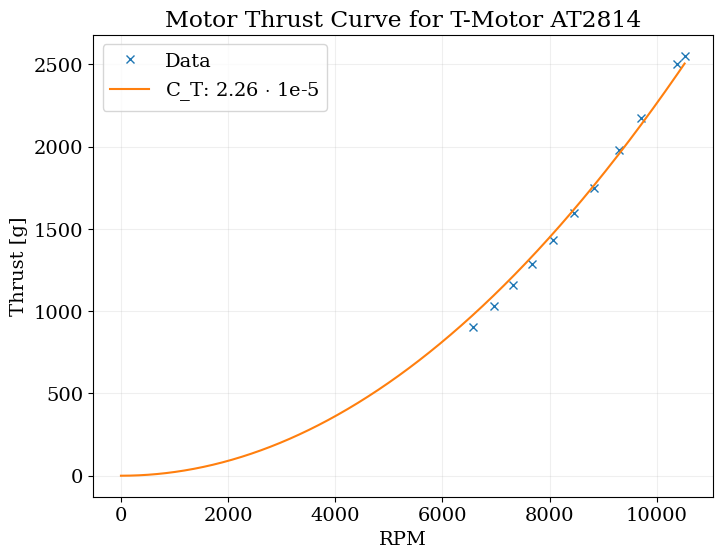

In [8]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["mathtext.fontset"] = "cm"

rpm = [6563, 6954, 7323, 7678, 8058, 8455, 8829, 9298, 9708, 10384, 10518]
thr = [904, 1033, 1158, 1287, 1430, 1600, 1749, 1979, 2172, 2503, 2553]

def quad_fit(x, a):
    return a * x ** 2



popt, pcov = curve_fit(quad_fit, rpm, thr)

plt.plot(rpm, thr, "x", label="Data")
x_lin = np.linspace(0, max(rpm), 1000)

plt.plot(x_lin, quad_fit(x_lin, *popt), label=f"C_T: {popt[0]*1e5:.2f} $\cdot$ 1e-5")

plt.xlabel("RPM")
plt.ylabel("Thrust [g]")
plt.grid(alpha=0.2)
plt.legend()
plt.title("Motor Thrust Curve for T-Motor AT2814")